In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
from PIL import Image
from PIL import ImageOps 

In [4]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/05/58/7ee92b21cb98689cbe28c69e3cf8ee51f261bfb6bc904ae578736d22d2e7/opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl.metadata (19 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl (54.7 MB)


In [32]:
def AdaptiveMedianFilter(img, kernel_size):
    SS = kernel_size  # 초기 커널 크기
    ss = int((SS - 1) / 2)
    outimg = np.zeros(np.shape(img))
    zmin = np.zeros(np.shape(img))
    zmax = np.zeros(np.shape(img))
    zmed = np.zeros(np.shape(img))
    for x in range(ss, np.size(img, 0) - ss):
        for y in range(ss, np.size(img, 1) - ss):
            # Ensure the selected region doesn't exceed image dimensions
            Sxy = img[max(0, x - ss) : min(np.size(img, 0), x - ss + SS), 
                      max(0, y - ss) : min(np.size(img, 1), y - ss + SS)]
            
            # Check if Sxy is non-empty
            if Sxy.size > 0:
                zmin[x, y] = np.min(Sxy)
                zmax[x, y] = np.max(Sxy)
                zmed[x, y] = np.median(Sxy)
                zxy = img[x, y]
                if zmed[x, y] - zmin[x, y] > 0 and zmax[x, y] - zmed[x, y] > 0:
                    if zxy - zmin[x, y] > 0 and zmax[x, y] - zxy > 0:
                        outimg[x, y] = zxy
                    else:
                        outimg[x, y] = zmed[x, y]
                else:
                    SS = SS+2
                    if SS > 7:
                        outimg[x, y] = zmed[x, y]
                        break
                    else:
                        ss = int((SS-1)/2)
                        Sxy = img[max(0, x - ss) : min(np.size(img, 0), x - ss + SS), 
                                  max(0, y - ss) : min(np.size(img, 1), y - ss + SS)]
                        zmin[x,y] = np.min(Sxy)
                        zmax[x,y] = np.max(Sxy)
                        zmed[x,y] = np.median(Sxy)
                        zxy = img[x,y]
                        if zmed[x,y]-zmin[x,y]>0 and zmax[x,y]-zmed[x,y]>0:
                            if zxy-zmin[x,y]>0 and zmax[x,y]-zxy>0:
                                outimg[x,y] = zxy
                            else:
                                outimg[x,y] = zmed[x,y]
                        else:
                            outimg[x,y] = zmed[x,y]
    return outimg

In [34]:
# Adaptive Median Filtering
#f = f_sp
f =  np.random.randint(0, 256, size=(32, 32))
SS_vals = np.array([3, 5, 7, 9])
r_amedian = np.zeros(np.shape(f))
r_median = np.zeros(np.shape(f))
r_case = np.zeros(np.shape(f))

ss_max = int((np.max(SS_vals)-1)/2)
for x in range(ss_max,np.size(f,0)-ss_max):
  for y in range(ss_max,np.size(f,1)-ss_max):
    flag_go = 1
    cnt = 0
    z_xy = f[x,y]
    for SS in SS_vals:
      ss = int((SS-1)/2)
      Sxy = f[x-ss:x-ss+SS,y-ss:y-ss+SS]
      z_med = np.median(Sxy)
      z_min = np.min(Sxy)
      z_max = np.max(Sxy)

      if cnt==0:
        r_median[x,y] = z_med

      if z_min<z_med and z_med<z_max:
        if z_min<z_xy and z_xy<z_max:
          r_amedian[x,y] = z_xy
          flag_go = 0
        else:
          r_amedian[x,y] = z_med
          flag_go = 0
      else:
        if SS == np.max(SS_vals):
          r_amedian[x,y] = z_med
          flag_go = 0

      if flag_go==0:
        r_case[x,y] = cnt
        break
      cnt = cnt+1

In [25]:
print(r_amedian)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
AdaptiveMedianFilter(f, 3)

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 159., 209., ..., 180., 111.,   0.],
       [  0., 121.,  74., ..., 111.,  64.,   0.],
       ...,
       [  0., 175.,  54., ..., 207.,  53.,   0.],
       [  0.,  49.,  16., ...,  46.,  42.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [21]:
# # Define the file path to save the matrix values
# file_path = "r_amedian_matrix.txt"

# # Save the matrix to the text file
# np.savetxt(file_path, r_amedian)

# # Print a message indicating the file has been saved
# print("Matrix values saved to", file_path)


Matrix values saved to r_amedian_matrix.txt


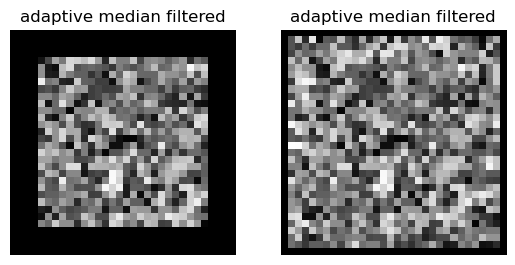

In [35]:
plt.subplot(121)
plt.imshow(r_amedian,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('adaptive median filtered')
plt.subplot(122)
output = AdaptiveMedianFilter(f, 3)
plt.imshow(output,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('adaptive median filtered')
plt.show()

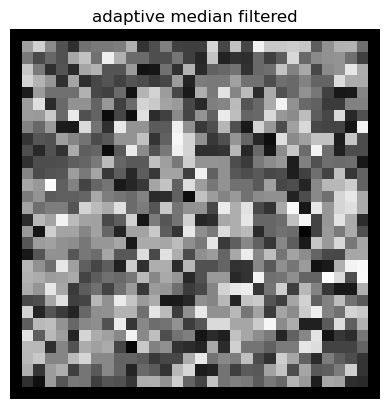

In [28]:
output = AdaptiveMedianFilter(f, 3)
plt.imshow(output,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('adaptive median filtered')
plt.show()

In [13]:
def my_conv2D(img, kernel):    
    SS = kernel.shape[0] # kernel size (for square kernel)
    ss = int((SS-1)/2)
    outimg = np.zeros(np.shape(img))
    for x in range(ss,np.size(img,0)-ss):
        for y in range(ss,np.size(img,1)-ss):
            Sxy = img[x-ss:x-ss+SS,y-ss:y-ss+SS]
            outimg[x,y] = np.sum(Sxy*kernel)
    return outimg

In [8]:
input = np.array([[1, 2, 3, 4,5], [6, 7, 8, 9,10], [11, 12, 13, 14,15], [16, 17, 18, 19,20], [21, 22, 23, 24,25]])

In [9]:
output = my_conv2D(input, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])) # Sobel filter
print(output)

[[  0.   0.   0.   0.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0.   0.   0.   0.   0.]]


In [16]:
def grayscale(image):
    return image.convert('L')

In [17]:
image = Image.open('/Users/yuchangmin/3_2/digital_image/HW/HW2/test.jpg')
image = grayscale(image)
image_arr = np.array(image)

In [11]:
def sobel(image):
    return cv2.Sobel(image, cv2.CV_8U, 1, 1, ksize=3) # 물체 외곽선 추출

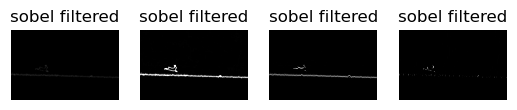

In [19]:
output_vertical = my_conv2D(image_arr, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))  # 수직 방향 Sobel filter
output_horizontal = my_conv2D(image_arr, np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]))  # 수평 방향 Sobel filter

# 두 방향의 결과를 합산하여 종합적인 엣지 정보 얻기
combined_output = np.sqrt(output_vertical**2 + output_horizontal**2)

output3 = sobel(image_arr)

plt.subplot(141)
plt.imshow(output3,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('sobel filtered')
plt.subplot(142)
plt.imshow(combined_output,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('sobel filtered')
plt.subplot(143)
plt.imshow(output_vertical,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('sobel filtered')
plt.subplot(144)
plt.imshow(output_horizontal,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('sobel filtered')
plt.show()

In [7]:
output2 = sobel(input)
print(output2)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'Sobel'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [20]:
import scipy.signal as signal

In [21]:
f = np.array([[1, 2, 3, 4,5], [6, 7, 8, 9,10], [11, 12, 13, 14,15], [16, 17, 18, 19,20], [21, 22, 23, 24,25]])

In [25]:
w1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
w2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
g1 = signal.convolve2d(f,w1, mode='same', boundary='fill', fillvalue=0)
print(g1)

[[-19 -28 -32 -36 -29]
 [-30 -40 -40 -40 -30]
 [-30 -40 -40 -40 -30]
 [-30 -40 -40 -40 -30]
 [ 49  68  72  76  59]]


In [5]:
f = plt.imread('/Users/yuchangmin/3_2/digital_image/1017/imgfiles/circuitboard-saltandpep.tif')
SS_vals = np.array([3, 5, 7])
r_amedian = np.zeros(np.shape(f))
r_median = np.zeros(np.shape(f))

ss_max = int((np.max(SS_vals)-1)/2)
for x in range(ss_max,np.size(f,0)-ss_max):
    for y in range(ss_max,np.size(f,1)-ss_max):
        flag_go = 1
        cnt = 0
        z_xy = f[x,y]
        for SS in SS_vals:
            ss = int((SS-1)/2)
            Sxy = f[x-ss:x-ss+SS,y-ss:y-ss+SS]
            z_med = np.median(Sxy)
            z_min = np.min(Sxy)
            z_max = np.max(Sxy)
            
            if cnt == 0:
                r_median[x,y] = z_med
            
            if z_med>z_min and z_med<z_max:
                if z_xy>z_min and z_xy<z_max:
                    r_amedian[x,y] = z_xy
                    flag_go=0
                else:
                    r_amedian[x,y] = z_med
                    flag_go=0
            else:
                if SS == np.max(SS_vals):
                    r_amedian[x,y] = z_med
                    flag_go=0
            if flag_go==0:
                break
            cnt += 1
                    
                
        

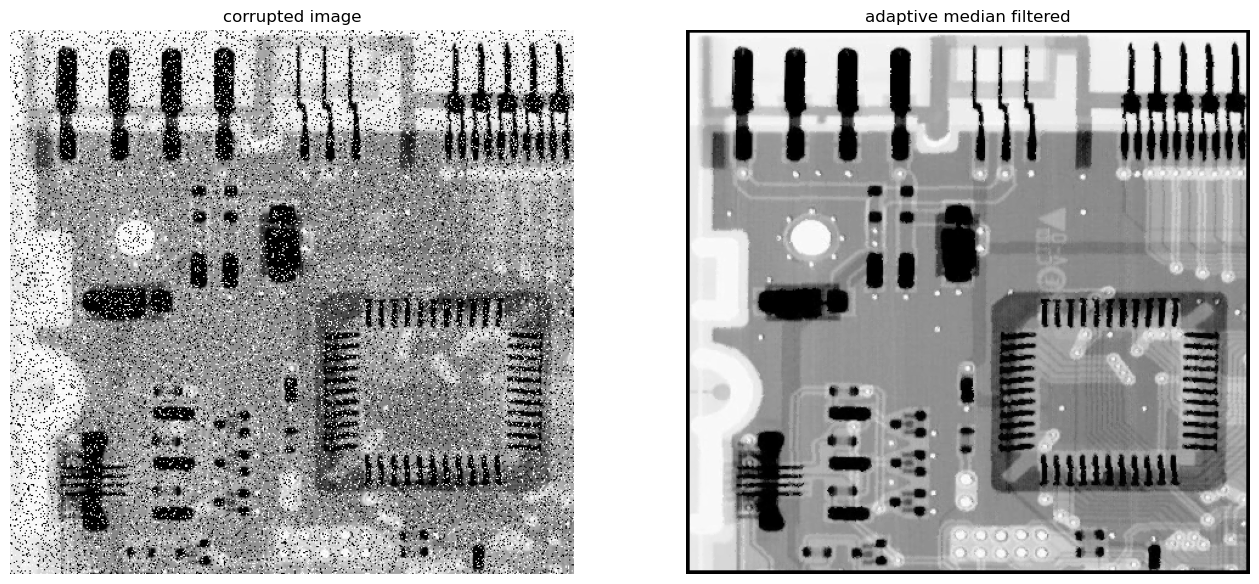

In [6]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.imshow(f,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('corrupted image')
plt.subplot(122)
plt.imshow(r_amedian,cmap='gray',aspect='equal',vmin=0,vmax=255)
plt.axis('off')
plt.title('adaptive median filtered')
plt.show()